<a href="https://colab.research.google.com/github/jett220201/MachineLearning/blob/main/Titanic/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Normalizar dataset
from sklearn.preprocessing import StandardScaler
#PCA
from sklearn import decomposition
from sklearn.decomposition import PCA, KernelPCA
#Dividir dataset
from sklearn.model_selection import train_test_split
#Regresión logistica
from sklearn.linear_model import LogisticRegression
#KNN
from sklearn.neighbors import KNeighborsClassifier
#SVM
from sklearn import svm
#Metrica MMC
from sklearn.metrics import matthews_corrcoef
#Regresión con Red Neural
from sklearn.neural_network import MLPRegressor

In [ ]:
titanic = pd.read_csv("train.csv",sep=";")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,84.583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,518.625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,111.333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,300.708,NaN,C


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [ ]:
titanic.shape[0]

891

In [ ]:
tita = titanic.dropna( axis = 0, subset=['Age', 'Sex' , 'Pclass' ])
tita.shape

(714, 15)

In [ ]:
#Relleno de vectores vacios en 'AGE' usando regresión de una red neuronal
tit = titanic.dropna()

xTrain1 = tit[['Pclass']]
yTrain1 = tit[['Age']].values.flatten()

scaler = StandardScaler().fit(xTrain1.values)
xTrainScaled = scaler.transform(xTrain1.values)

#regressor
regr = MLPRegressor(random_state=1, max_iter=5000).fit(xTrainScaled, yTrain1)
#test
xTest = titanic[['Pclass']].dropna()
xTestScaled = scaler.transform(xTest.values)
#regression
yPredict = regr.predict(xTestScaled)

titanic['nnAge'] = 0
#fill the new column with original and predicted values for Est2
for index, row in titanic.iterrows():
    if np.isnan(row['Age']) and ~np.isnan(row['Pclass']):
        rowScaled = scaler.transform([[row['Pclass']]])
        titanic.loc[index,['nnAge']] = regr.predict(rowScaled)
    elif ~np.isnan(row['Age']):
        titanic.loc[index,['nnAge']] = row['Age']
    else:
        row['nnAge'] = np.nan
titanic.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nnAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,84.583,NaN,Q,22.083732
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,518.625,E46,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,111.333,NaN,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,300.708,NaN,C,14.000000


In [ ]:
#Codificación del genero del pasajero: 
#      1 -> male
#      2 -> female
Gender = []
for i in range(titanic.shape[0]):
  if titanic['Sex'][i]=='male':
    Gender.append(1)
  else:
    Gender.append(0)
titanic["Gender"]=Gender
titanic.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nnAge,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,22.000000,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C,38.000000,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,26.000000,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,35.000000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,35.000000,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,84.583,NaN,Q,22.083732,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,518.625,E46,S,54.000000,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,2.000000,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,111.333,NaN,S,27.000000,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,300.708,NaN,C,14.000000,0


In [ ]:
nAge = titanic["Age"].fillna(titanic["Age"].mean()) #Creación  de columnas con relleno

#titanic1 = titanic #creación de un nuevo dataset modificado con relleno
#titanic1["nAge"] = nAge #Adición de nuevas columnas rellenadas
titanic["nAge"] = nAge
#titanic1.head(30)


In [ ]:
X = titanic[['nnAge', 'Pclass','Gender']].values #Adquisición de caracteristicas
y = titanic['Survived'].values #Adquisición de etiquetas 

In [ ]:
#Partición del dataset en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Normalización de los datos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


PCA

In [ ]:
pca = decomposition.PCA(whiten=True,svd_solver='auto')
pca.fit(X_train)
X_trainPCA = pca.transform(X_train) #

print("Pesos de PCA:", pca.explained_variance_ratio_)

Pesos de PCA: [0.47519734 0.34899994 0.17580271]


Kernel PCA

In [ ]:
gamma = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
kernel = ['rbf','poly']
degree = [2,3,4,5,6]

for g in gamma:
  kpca = KernelPCA(kernel='rbf', gamma = g,fit_inverse_transform=True)
  X_kpca = kpca.fit_transform(X_train)

      
  explained_variance = np.var(X_kpca, axis=0)                                 #Malo
  explained_variance_ratio = explained_variance / np.sum(explained_variance)  #No se puede interpretar
  Pesos = np.cumsum(explained_variance_ratio)                                 #igual que PCA

  print("Gamma =" + str(g))
  print("Pesos de K-PCA:", Pesos)

#Regresión Logistica


In [ ]:
#Xoriginal = titanic1[['nnAge','nSibSp', 'Pclass']].values #Adquisición de caracteristicas
Xoriginal = titanic[['nnAge', 'Pclass','Gender']].values #Adquisición de caracteristicas
y = titanic['Survived'].values #Adquisición de etiquetas 

xsize=len(Xoriginal)
Xtotal=np.hstack((np.ones((xsize, 1)),Xoriginal)) #Agregar el sesgo
Xtotal=np.hstack((Xtotal,(Xoriginal[:,0]*Xoriginal[:,1]).reshape((xsize, 1)))) 
Xtotal=np.hstack((Xtotal,(Xoriginal[:,0]*Xoriginal[:,2]).reshape((xsize, 1)))) 
Xtotal=np.hstack((Xtotal,(Xoriginal[:,1]*Xoriginal[:,2]).reshape((xsize, 1)))) 
Xtotal=np.hstack((Xtotal,np.power(Xoriginal,2)))
Xtotal=np.hstack((Xtotal,np.power(Xoriginal,3)))
Xtotal=np.hstack((Xtotal,np.power(Xoriginal,4)))
Xtotal=np.hstack((Xtotal,np.power(Xoriginal,5)))
Xtotal=np.hstack((Xtotal,np.power(Xoriginal,6)))
Xtotal=np.hstack((Xtotal,np.power(Xoriginal,7)))
Xtotal=np.hstack((Xtotal,np.power(Xoriginal,8)))
Xtotal=np.hstack((Xtotal,np.power(Xoriginal,9)))

#Partición del dataset en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(Xtotal, y, test_size=0.2, random_state=0)

#Normalización de los datos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

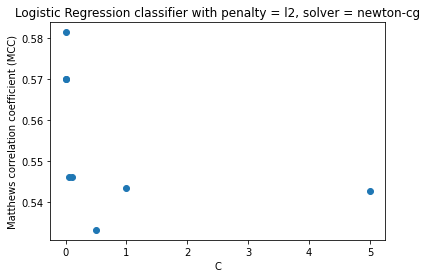

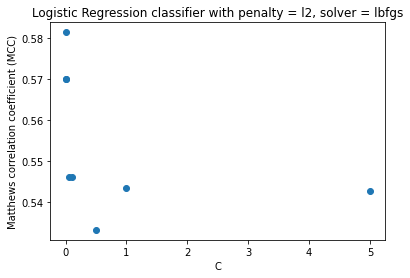

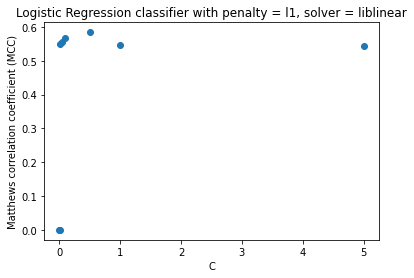

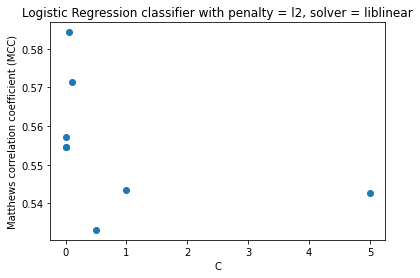

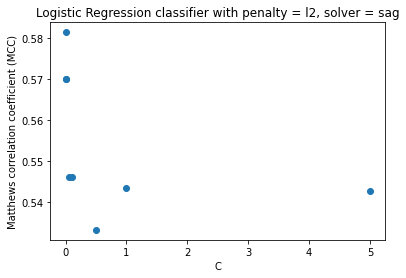

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


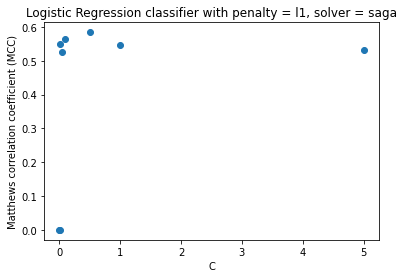

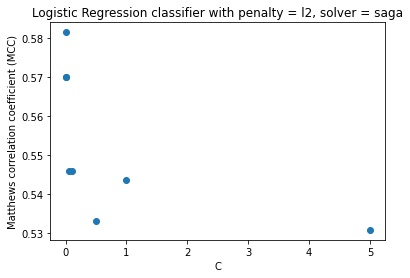

('l1', 0.5, 'liblinear')


In [ ]:
cc = [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5 ]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hiperparametro = []
metric = []


for s in solver:
  if s == 'newton-cg':
    penalty = ['l2']
  elif s == 'lbfgs':
    penalty = ['l2']
  elif s == 'liblinear':
    penalty = ['l1','l2']
  elif s == 'sag':
    penalty = ['l2']
  else:
    penalty = ['l1', 'l2']
  for p in penalty:
    scores = []
    for c in cc:
      LR = LogisticRegression(penalty=p, max_iter=3000, C=c, random_state=0, solver=s) 
      LR.fit(X_train, y_train)

      scores.append(matthews_corrcoef(y_test,LR.predict(X_test)))
      hiperparametro.append((p,c,s))

    metric.append(scores)
    plt.figure()
    plt.xlabel('C')
    plt.ylabel('Matthews correlation coefficient (MCC)')
    plt.title('Logistic Regression classifier with penalty = ' + str(p) + ', solver = ' + str(s) )
    plt.scatter(cc, scores)
    plt.show()
ind = np.argmax(metric)
print(hiperparametro[ind])

In [ ]:
p = hiperparametro[ind][0]
c = hiperparametro[ind][1]
s = hiperparametro[ind][2]
 
LR = LogisticRegression(penalty=p, max_iter=1000, C=c, random_state=0, solver=s) 
LR.fit(X_train, y_train)
print('MCC =  ' , matthews_corrcoef(y_test,LR.predict(X_test)))

MCC =   0.5842861694210296


#KNN


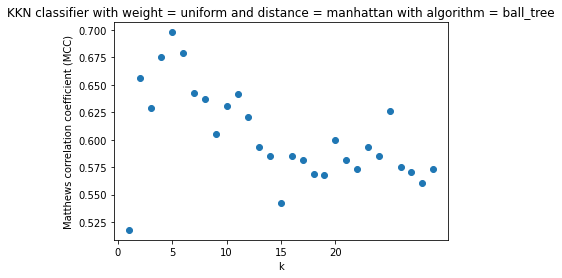

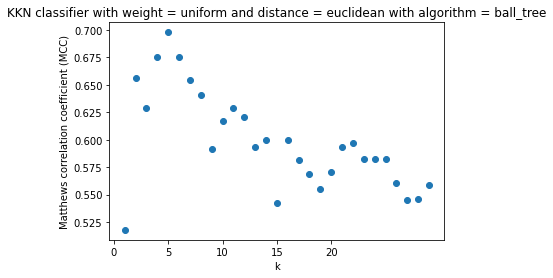

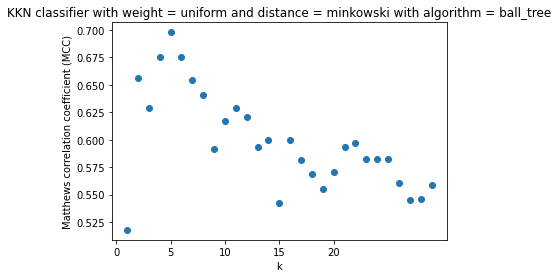

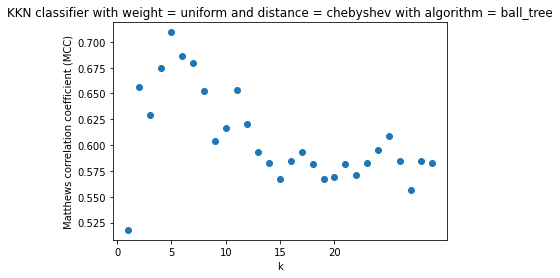

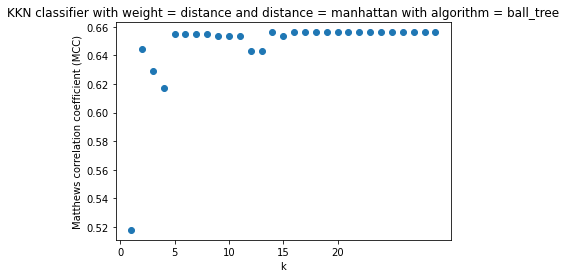

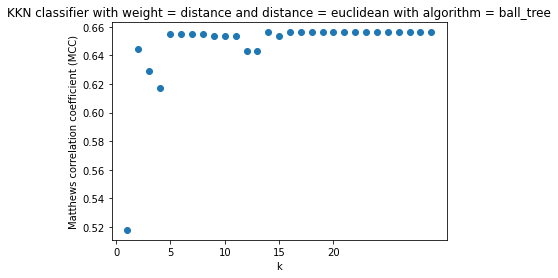

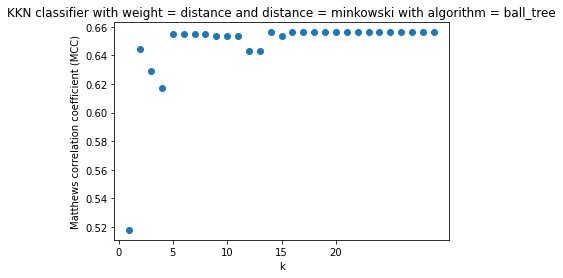

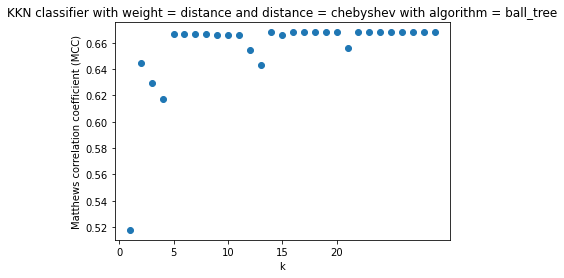

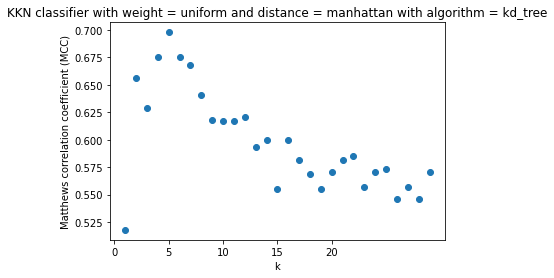

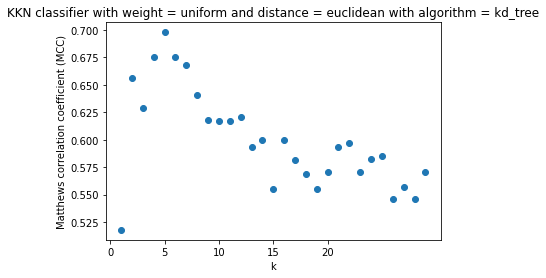

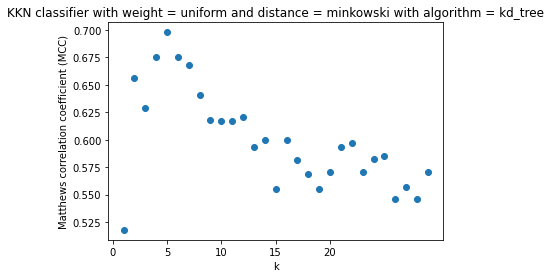

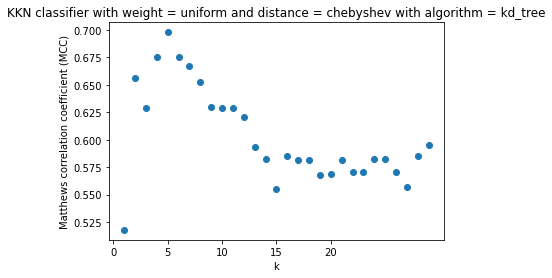

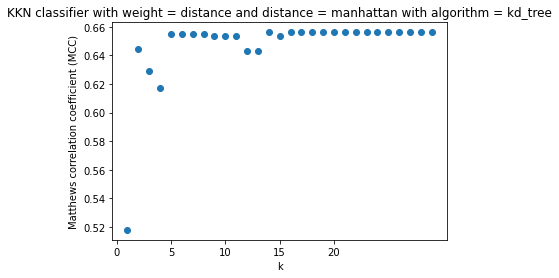

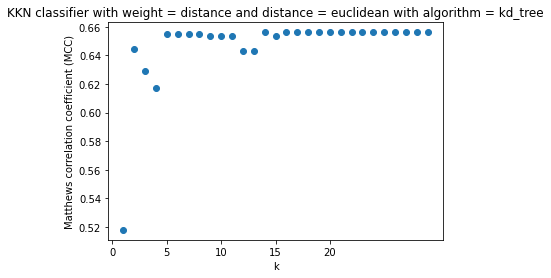

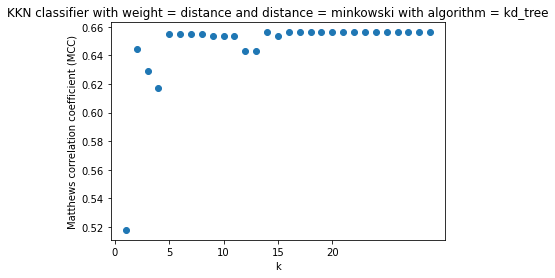

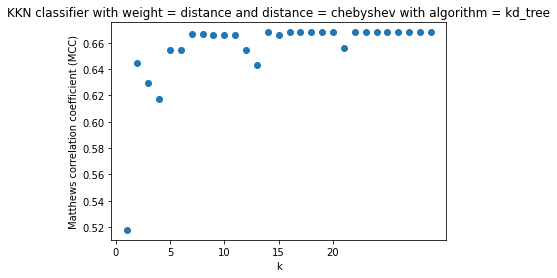

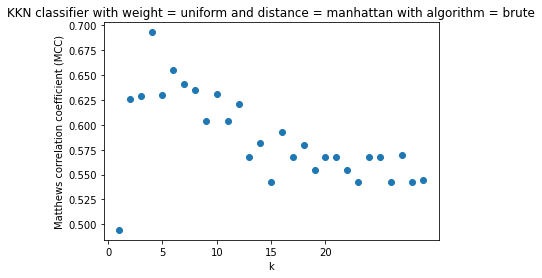

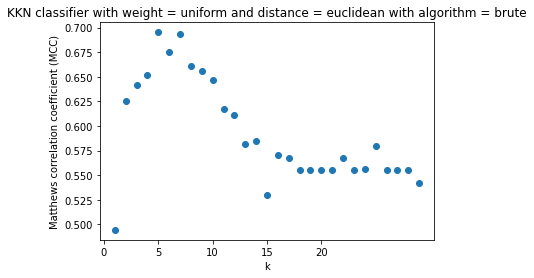

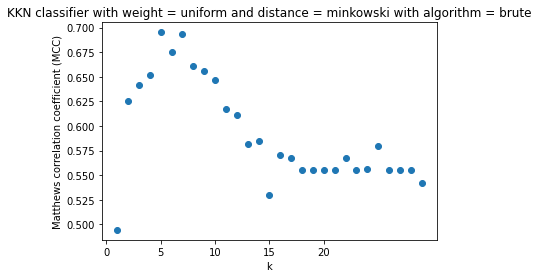

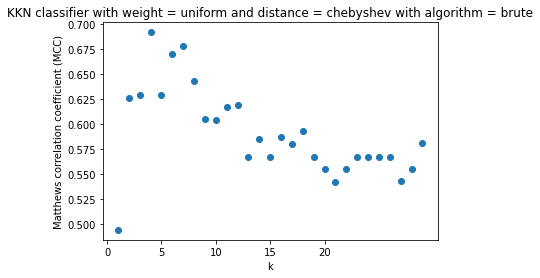

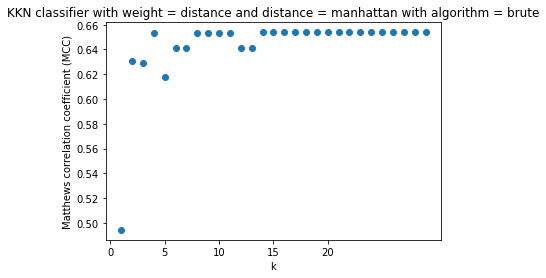

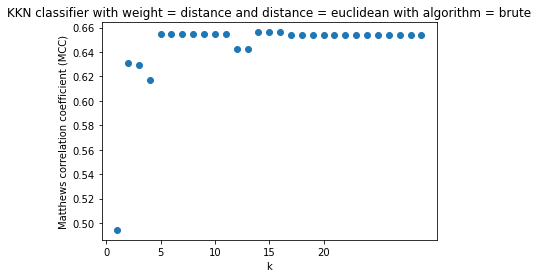

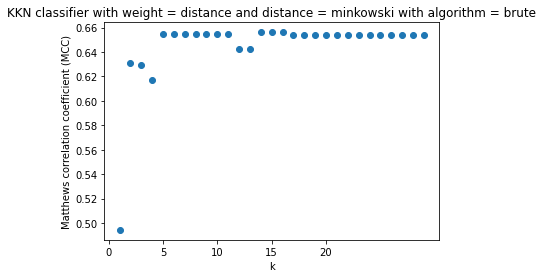

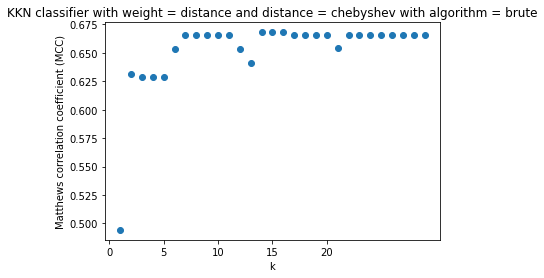

(5, 'uniform', 'chebyshev', 'ball_tree')


In [ ]:
k_range = range(1, 30)
distance = ['manhattan','euclidean','minkowski', 'chebyshev']
weights = ['uniform', 'distance']
algo = ['ball_tree', 'kd_tree', 'brute']
hiperparametro = []
metric = [] 
for a in algo:
  for w in weights:
    for d in distance:
      scores = []
      for k in k_range:
          knn = KNeighborsClassifier(n_neighbors = k,weights = w, metric = d, metric_params=None,algorithm=a)
          knn.fit(X_train, y_train) 
          scores.append(matthews_corrcoef(y_test,knn.predict(X_test))) #Primero va el Y verdadero y luego el Y predicho
          hiperparametro.append((k,w,d,a))
      metric.append(scores)
      plt.figure()
      plt.xlabel('k')
      plt.ylabel('Matthews correlation coefficient (MCC)')
      plt.title('KKN classifier with weight = ' + str(w) + ' and distance = ' + str(d) + ' with algorithm = ' + str(a))
      plt.scatter(k_range, scores)
      plt.xticks([0,5,10,15,20])
      plt.show()
ind = np.argmax(metric)
print(hiperparametro[ind])

In [ ]:
k = hiperparametro[ind][0]  
w = hiperparametro[ind][1]
d = hiperparametro[ind][2]
a = hiperparametro[ind][3]
knn = KNeighborsClassifier(n_neighbors = k,weights = w, metric = d, metric_params=None,algorithm=a)
knn.fit(X_train, y_train)
print('MCC = ' , matthews_corrcoef(y_test,knn.predict(X_test))) 

MCC =  0.7093221633268395


In [ ]:
#Prueba con todo el dataset (sin partición 20-80)
k = hiperparametro[ind][0]  
w = hiperparametro[ind][1]
d = hiperparametro[ind][2]
a = hiperparametro[ind][3]
knn = KNeighborsClassifier(n_neighbors = k,weights = w, metric = d, metric_params=None,algorithm=a)
knn.fit(X, y)
print('MCC = ' , matthews_corrcoef(y,knn.predict(X))) 

MCC =  0.6412756491985072


In [ ]:
titanicTest = pd.read_csv("test.csv",sep=";") #Lectura del dataset para pruebas

Gender = [] #Codificación numerica del genero
for i in range(titanicTest.shape[0]):
  if titanicTest['Sex'][i]=='male':
    Gender.append(1)
  else:
    Gender.append(0)

titanicTest["Gender"]=Gender #asignación de la nueva columna de genero

nTAge = titanicTest["Age"].fillna(titanicTest["Age"].mean()) #Creación  de columnas con relleno en Age usando la media

titanicTest["nAge"] = nTAge

In [ ]:
X_test = titanicTest[['nAge','Pclass','Gender']].values #Adquisición de caracteristicas
Result = knn.predict(X_test) #Predicción del clasificador KNN optimizado

df = pd.DataFrame() #Creación del dataframe para subirlo a Kaggle
df['PassengerId'] = titanicTest['PassengerId']
df['Survived'] = Result

#Guardado del dataframe en formato csv
df.to_csv('Titanic_Predict.csv',index=False)
from google.colab import files
files.download('Titanic_Predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#SVM

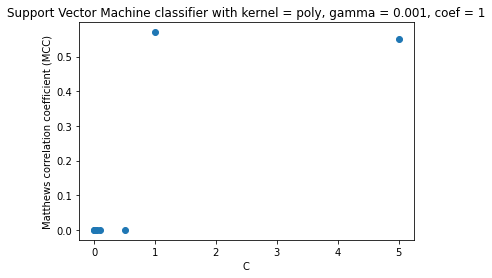

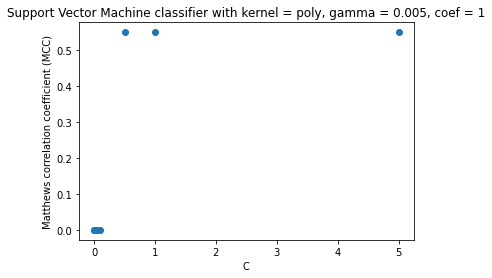

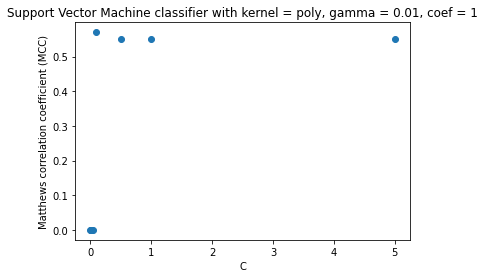

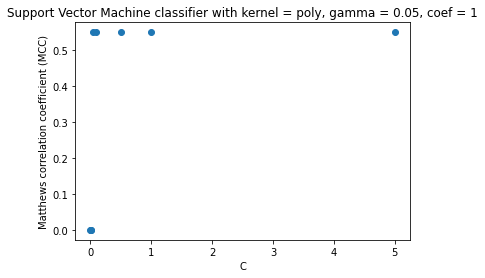

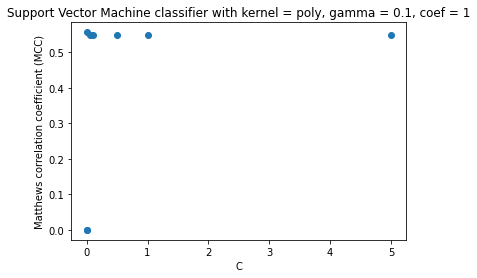

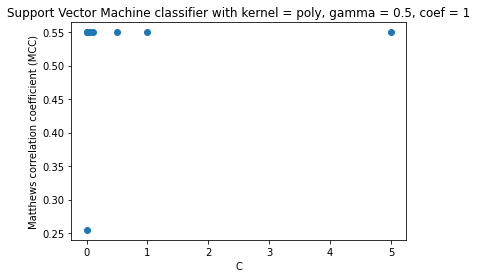

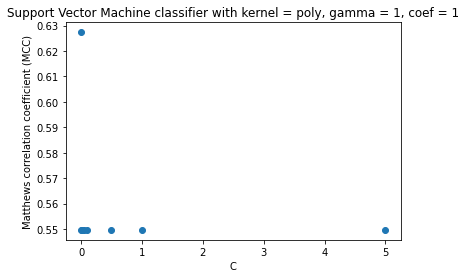

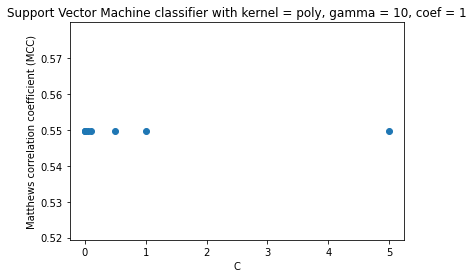

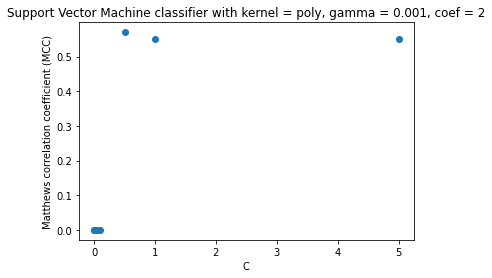

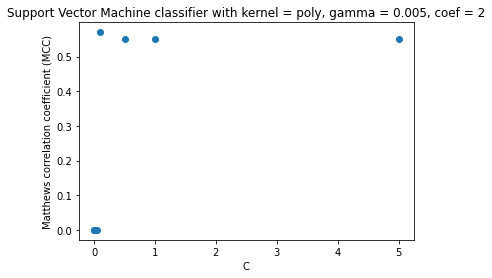

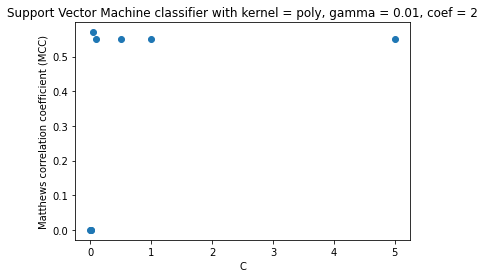

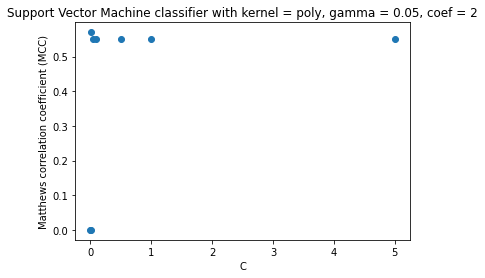

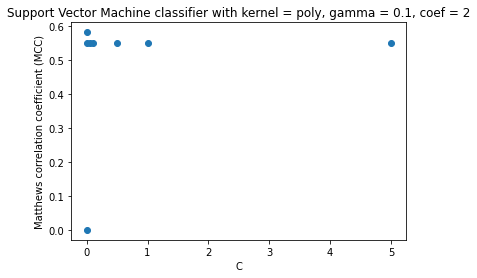

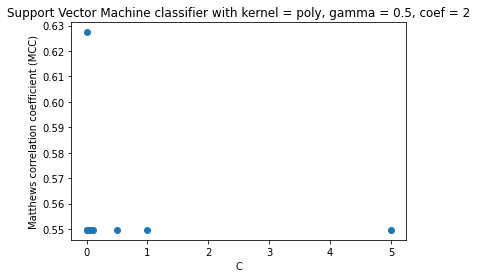

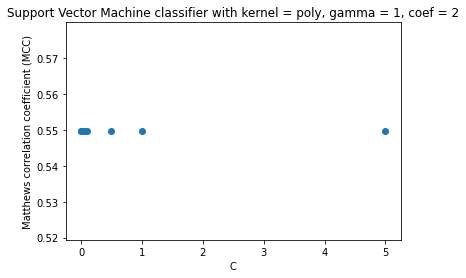

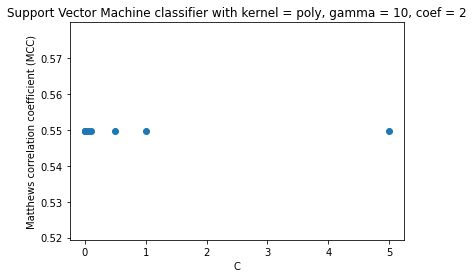

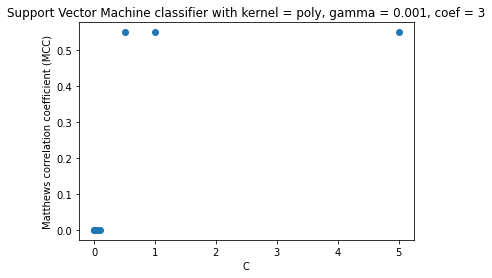

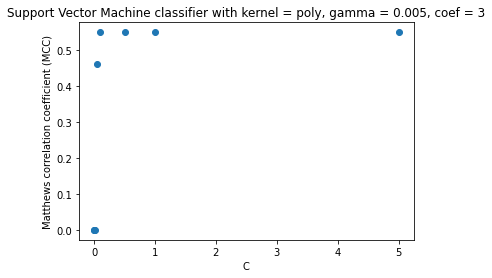

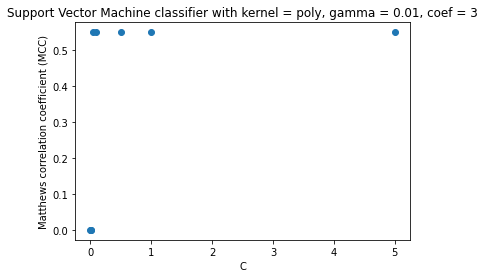

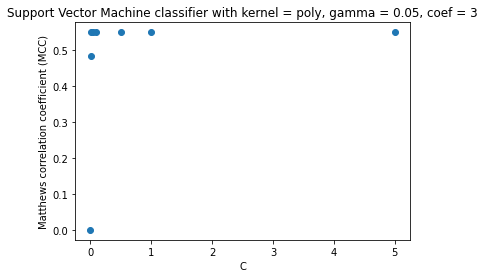

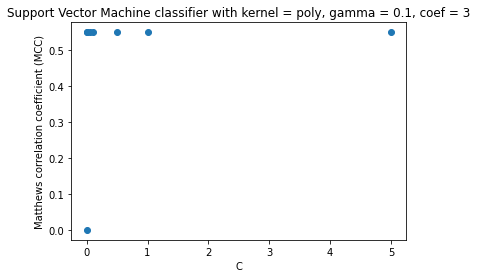

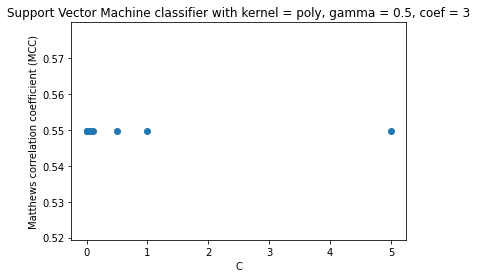

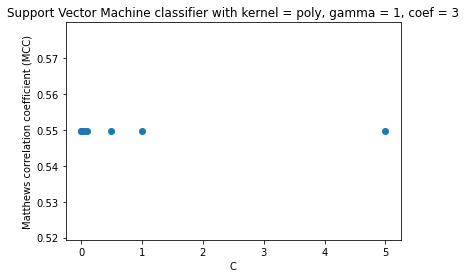

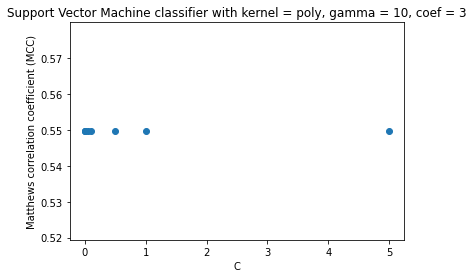

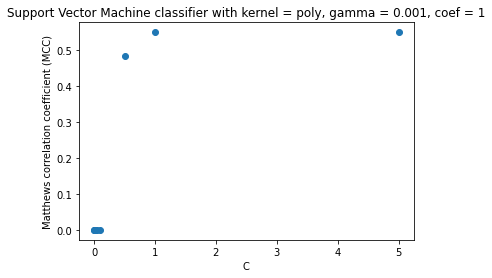

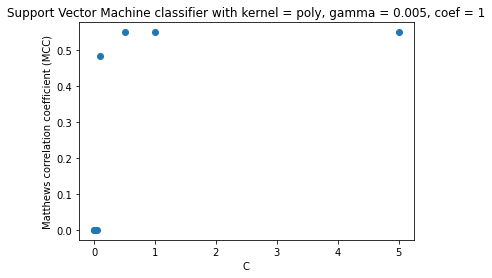

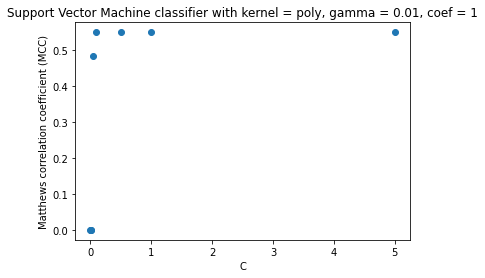

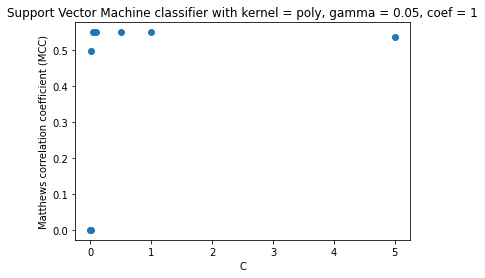

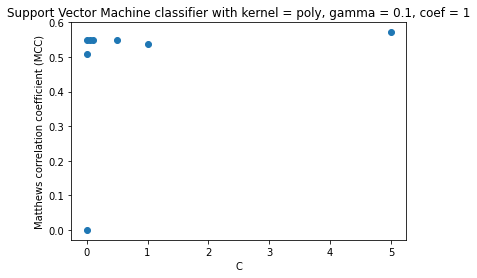

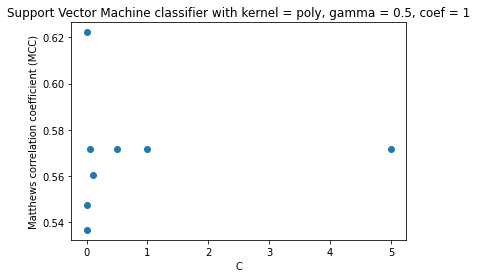

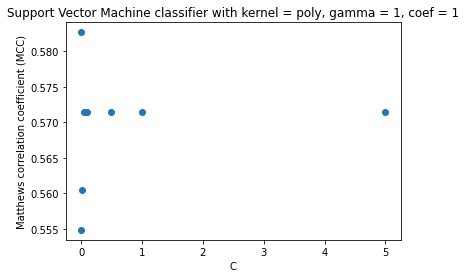

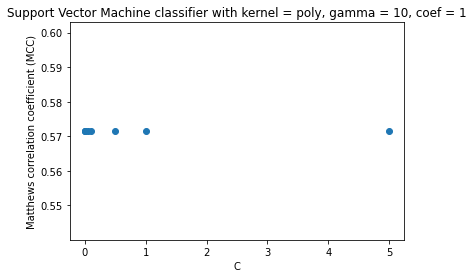

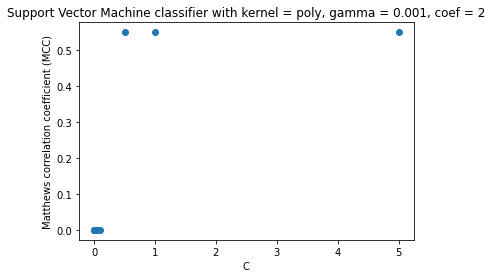

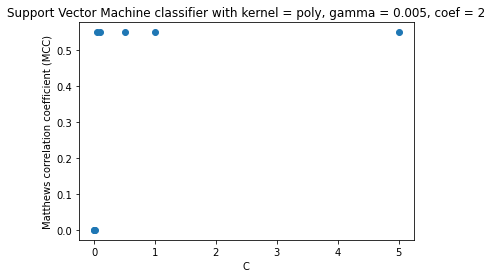

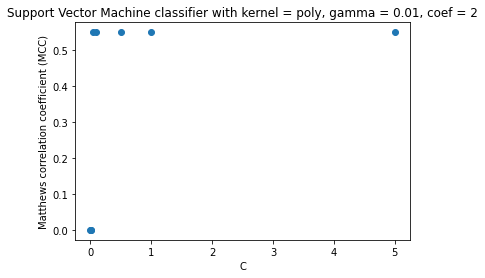

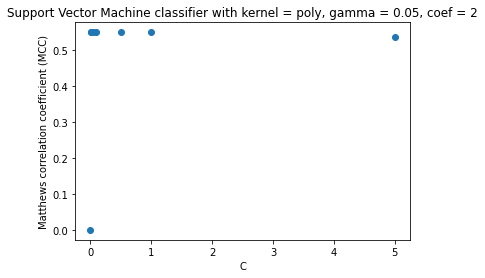

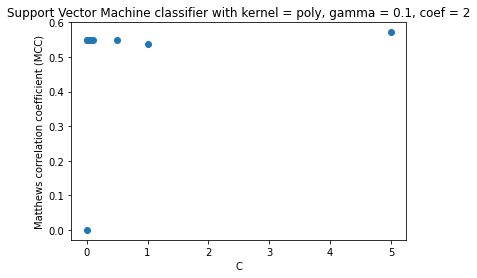

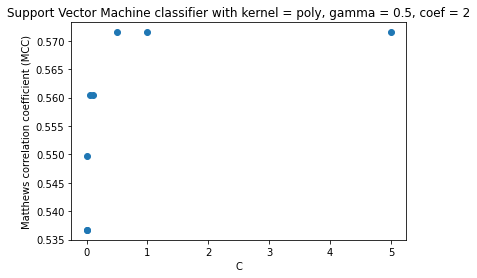

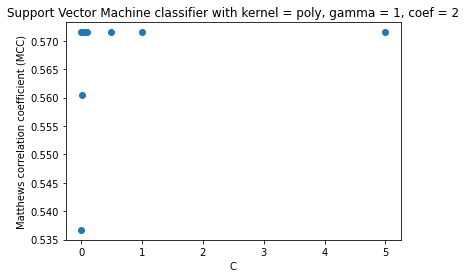

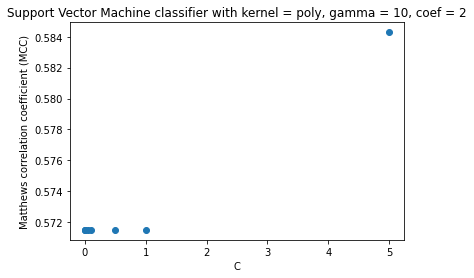

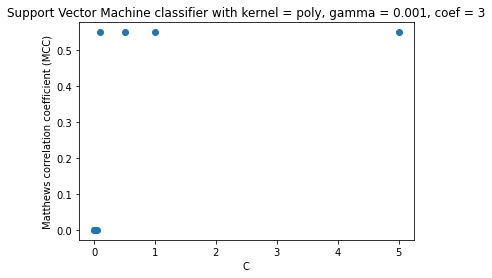

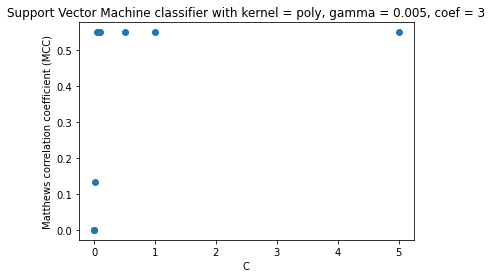

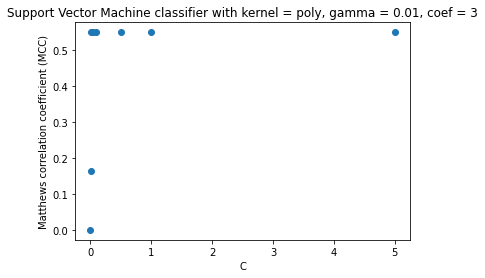

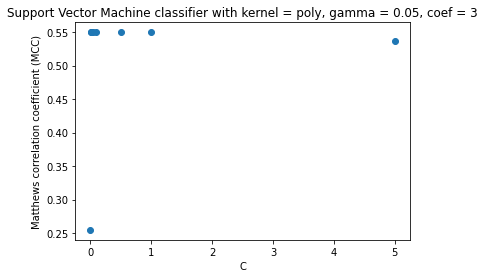

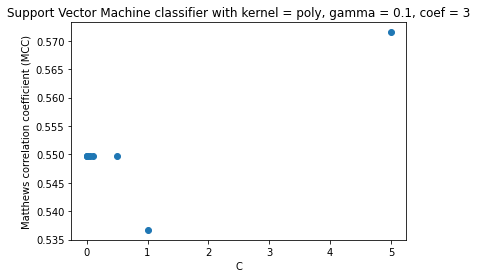

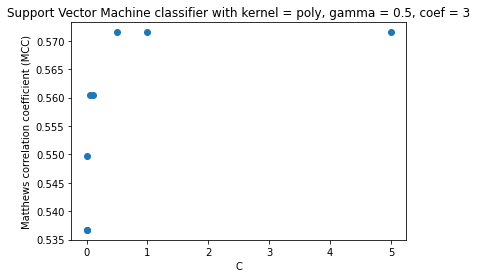

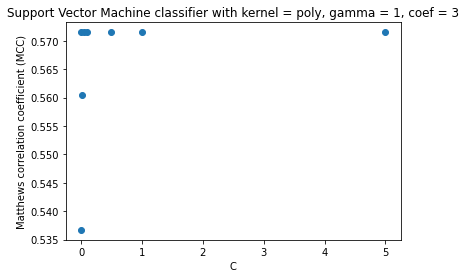

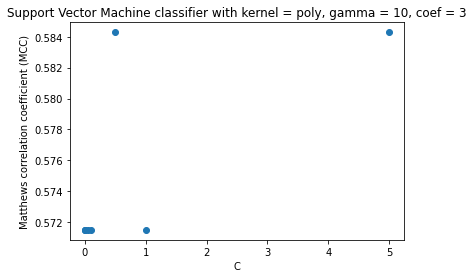

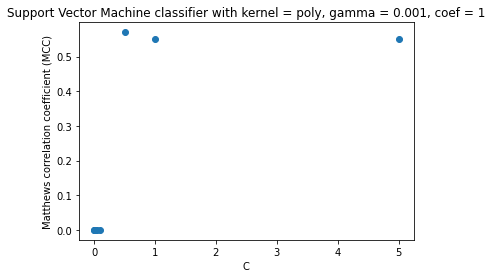

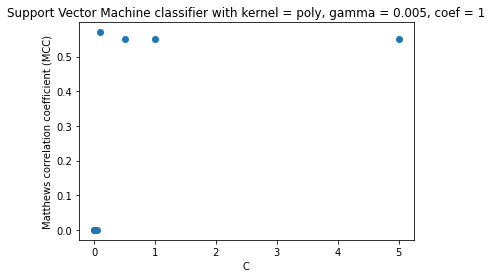

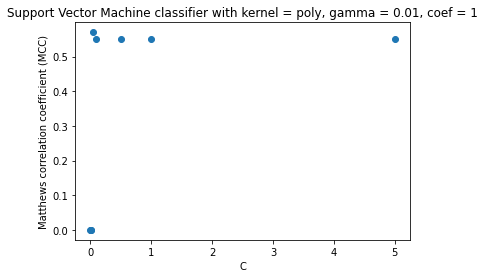

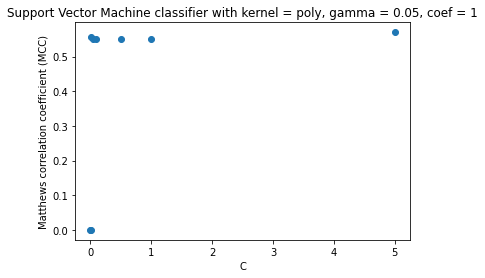

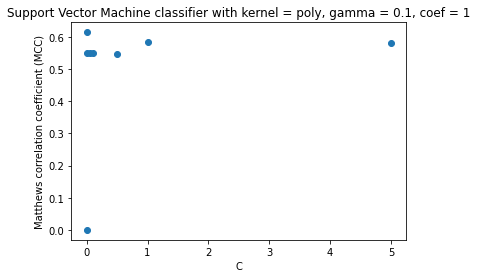

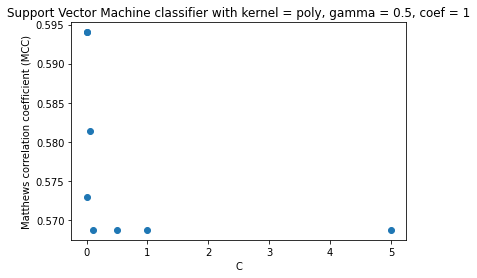

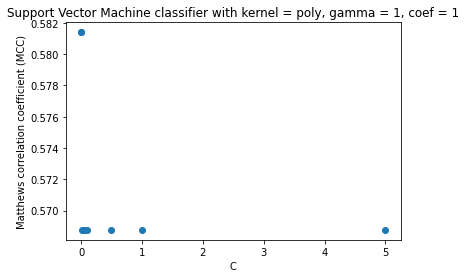

KeyboardInterrupt: ignored

In [ ]:
cc = [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5 ] #Regularization
kernel = ['poly','rbf', 'sigmoid']
degree = [2, 3, 4]
coeficient = [1, 2, 3]
gamma = [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10 ]
hiperparametro = []
metric = []

for k in kernel:
  for d in degree:
    for coef in coeficient:
      for g in gamma:
        scores = []
        for c in cc:
          msv = svm.SVC(kernel=k, gamma=g, C=c, degree=d, coef0=coef,decision_function_shape='ovo')
          msv.fit(X_train, y_train)

          scores.append(matthews_corrcoef(y_test,msv.predict(X_test)))
          hiperparametro.append((k,d,coef,c,g))

        metric.append(scores)
        plt.figure()
        plt.xlabel('C')
        plt.ylabel('Matthews correlation coefficient (MCC)')
        plt.title('Support Vector Machine classifier with kernel = ' + str(k) + ', gamma = ' + str(g) + ', coef = ' + str(coef))
        plt.scatter(cc, scores)
        plt.show()
ind = np.argmax(metric)
print(hiperparametro[ind])


In [ ]:
k = hiperparametro[ind][0]
d = hiperparametro[ind][1]
coef = hiperparametro[ind][2]
c = hiperparametro[ind][3] #Regularization
g = hiperparametro[ind][4]
msv = svm.SVC(kernel=k, gamma=g, C=c, degree=d, coef0=coef)
msv.fit(X_train, y_train)

print('MCC =  ' , matthews_corrcoef(y_test,msv.predict(X_test)))

MCC =   0.6335075248206751
